In [35]:
# Standard library
import logging
from collections import Counter

# Third-party libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib.ticker import MaxNLocator
from sqlalchemy import text

# Local application
from etl_pipeline import create_db_engine
from etl_pipeline import setup_logging

# Setup
setup_logging()
engine = create_db_engine()

In [ ]:
if engine:
    logging.info("Loading business table...")
    business = pd.read_sql_table('business', engine)
    
    logging.info("Loading checkin table...")
    checkin = pd.read_sql_table('checkin', engine)
    
    logging.info("Loading review table...")
    review = pd.read_sql_table('review', engine)
    
    logging.info("Loading tip table...")
    tip = pd.read_sql_table('tip', engine)
    
    logging.info("Loading users table...")
    users = pd.read_sql_table('users', engine)
    
    logging.info("business_df, checkin_df, review_df, tip_df, and users_df are now loaded.")
else:
    logging.error("Cannot load data, no database connection.")

In [ ]:
dfs = {
    "business": business,
    "checkin": checkin,
    "review": review,
    "tip": tip,
    "users": users
}


In [ ]:
for name, df in dfs.items():
    print(f"{name.upper()}:")
    print(f"Total Rows = {df.shape[0]}\nTotal Columns = {df.shape[1]}")
    display(df.head())

BUSINESS:
Total Rows = 150346
Total Columns = 12


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


CHECKIN:
Total Rows = 131930
Total Columns = 2


,business_id,date
0,2pMdDOWl14rU4jdAH4oZXw,"2010-02-19 17:20:12, 2010-03-02 21:23:32, 2010..."
1,2pO1gIZeTZoNHxPe0teumg,"2012-11-28 19:04:43, 2018-04-17 14:47:22"
2,2pVF6y4ulOVXI6ZjZgRp0g,"2012-12-29 03:54:38, 2012-12-31 12:53:05, 2013..."
3,2pWQjLkIynlvTdgPGxINvQ,"2018-01-21 13:14:31, 2018-01-27 02:58:14, 2018..."
4,2pWRW7ASh_Bw5q5V64Luuw,"2010-07-17 12:56:13, 2012-01-27 20:10:16, 2012..."


REVIEW:
Total Rows = 6990247
Total Columns = 9


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,GVrIzRnXGOhoXPv2K6GrPw,pkfyxvhpL_eGx6OCAxXzwg,QFzfm7Xe8i_7M6oS08c9YQ,5.0,0,0,0,My fiancée and I decided to go to CH tonight f...,2020-08-30 02:05:26
1,-YErXLN0lC5N5e07XMsdxw,TgIS8RyRyj3pug2ynwtF7Q,j1tSPWgrKnV4KeH5O0S6IA,5.0,0,0,0,I can't say enough how happy I am this wonderf...,2020-09-21 04:44:37
2,koIBvBbdWZWsDIMsu-lBEQ,Nf3Ta9eT7_kJ8eKkyF10fQ,LHfckMyH7hyS7l401mM4Lg,1.0,7,0,0,The absolute worst service staff I have ever c...,2019-05-25 12:03:24
3,S2cQYPIJXzg-n2alyKoOUw,586v_Vg1IJ93qfJZd9l5gg,DHh2hhY_USKix09y1d39yg,4.0,1,0,0,"Oops, thought I had posted this already, but a...",2020-07-30 14:30:35
4,JOd3wTq4aMC0VYquMaFv6Q,70N_HlUIUmqkoLRZdUEv5Q,JgiLG2kIDjBZfERKxcsJSA,1.0,0,0,0,Found hair in three different dishes of what w...,2020-06-05 23:48:09


TIP:
Total Rows = 908848
Total Columns = 5


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


USERS:
Total Rows = 1987897
Total Columns = 22


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,wxvyGoy6m6IY2F3Dyxqruw,John,1,2012-09-03 13:08:09,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1,SJYPqRI29YyFC5sSFxnP3A,Meghan,1,2014-11-11 16:13:34,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
2,RHKqiiDXbgUvLYxqd86AsA,Greg,18,2017-07-15 16:36:16,7,1,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
3,6JcBAl3H_VGT5ipcPrpDOA,Lisa,2,2016-02-16 20:33:24,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
4,tLTnf3KG7M87dXTGALEDsQ,Victiria,2,2019-11-09 01:13:27,2,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
logging.info("Pushing all modified data back to PostgreSQL...")

try:
    with engine.begin() as conn:  
        conn.execute(text("""
            ALTER TABLE review
            ALTER COLUMN date TYPE timestamp USING date::timestamp;
        """))
    logging.info("Successfully modified 'date' column in 'review' table.")
except Exception as e:
    logging.error(f"Error modifying column type: {e}")

# Deduplicate DataFrames
for name, df in dfs.items():
    duplicate_count = df.duplicated().sum()
    if duplicate_count > 0:
        logging.info(f"{name}: Found {duplicate_count} duplicate rows. Removing duplicates.")
        dfs[name] = df.drop_duplicates().reset_index(drop=True)
    else:
        logging.info(f"{name}: No duplicates found.")

# Push cleaned DataFrames to PostgreSQL
if engine:
    try:
        for table_name, df in dfs.items():
            df.to_sql(table_name, engine, if_exists='replace', index=False)
        logging.info("All cleaned tables have been successfully pushed to the database.")
    except Exception as e:
        logging.error(f"Error occurred during database push: {e}")
else:
    logging.critical("Database connection failed. Could not push data.")

In [ ]:
for name, df in dfs.items():
    print()
    print(f"{name.upper()}")
    print("=" * 30)
    print()
    print(df.dtypes)


BUSINESS

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
categories       object
dtype: object

CHECKIN

business_id    object
date           object
dtype: object

REVIEW

review_id              object
user_id                object
business_id            object
stars                 float64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object

TIP

user_id             object
business_id         object
text                object
date                object
compliment_count     int64
dtype: object

USERS

user_id                object
name                   object
review_count            int64
yelping_since          object
useful                  int64
funny        

In [ ]:
#Top Restaurants and Market Concentration
avg_stars = pd.read_sql_query(
    """ 
    SELECT 
        ROUND(AVG(stars)::numeric, 2) AS avg_stars_count,
        MAX(stars) AS max_stars_count,
        MIN(stars) AS min_stars_count
    FROM business
    """,
    engine
)

avg_review = pd.read_sql_query(
    """ 
    SELECT 
        ROUND(AVG(review_count), 2) AS avg_review_count,
        MAX(review_count) AS max_review_count,
        MIN(review_count) AS min_review_count
    FROM business
    """,
    engine
)

summary_stats = pd.concat([avg_stars, avg_review], axis=1)
display(summary_stats.T)


,0
avg_stars_count,3.60
max_stars_count,5.00
min_stars_count,1.00
avg_review_count,44.87
max_review_count,7568.00
min_review_count,5.00


,business_id,name,review_count,categories
0,_ab50qdWOk0DdB6XOrBitw,Acme Oyster House,7568,"Live/Raw Food, Seafood, Restaurants, Cajun/Creole"
1,ac1AeYqs8Z4_e2X5M3if2A,Oceana Grill,7400,"Restaurants, Seafood, Cajun/Creole, Breakfast ..."
2,GXFMD0Z4jEVZBCsbPf4CTQ,Hattie B’s Hot Chicken - Nashville,6093,"American (Traditional), Chicken Shop, Southern..."
3,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,5721,"Candy Stores, Shopping, Department Stores, Fas..."
4,oBNrLz4EDhiscSlbOl8uAw,Ruby Slipper - New Orleans,5193,"Restaurants, American (Traditional), American ..."
5,iSRTaT9WngzB8JJ2YKJUig,Mother's Restaurant,5185,"Cajun/Creole, Restaurants, Event Planning & Se..."
6,VQcCL9PiNL_wkGf-uF3fjg,Royal House,5070,"American (New), Restaurants, Sandwiches, Seafo..."
7,_C7QiQQc47AOEv4PE3Kong,Commander's Palace,4876,"French, Restaurants, Cocktail Bars, Nightlife,..."
8,GBTPC53ZrG1ZBY3DT8Mbcw,Luke,4554,"German, Restaurants, Seafood, Cocktail Bars, F..."
9,6a4gLLFSgr-Q6CZXDLzBGQ,Cochon,4421,"Cajun/Creole, Seafood, Restaurants"


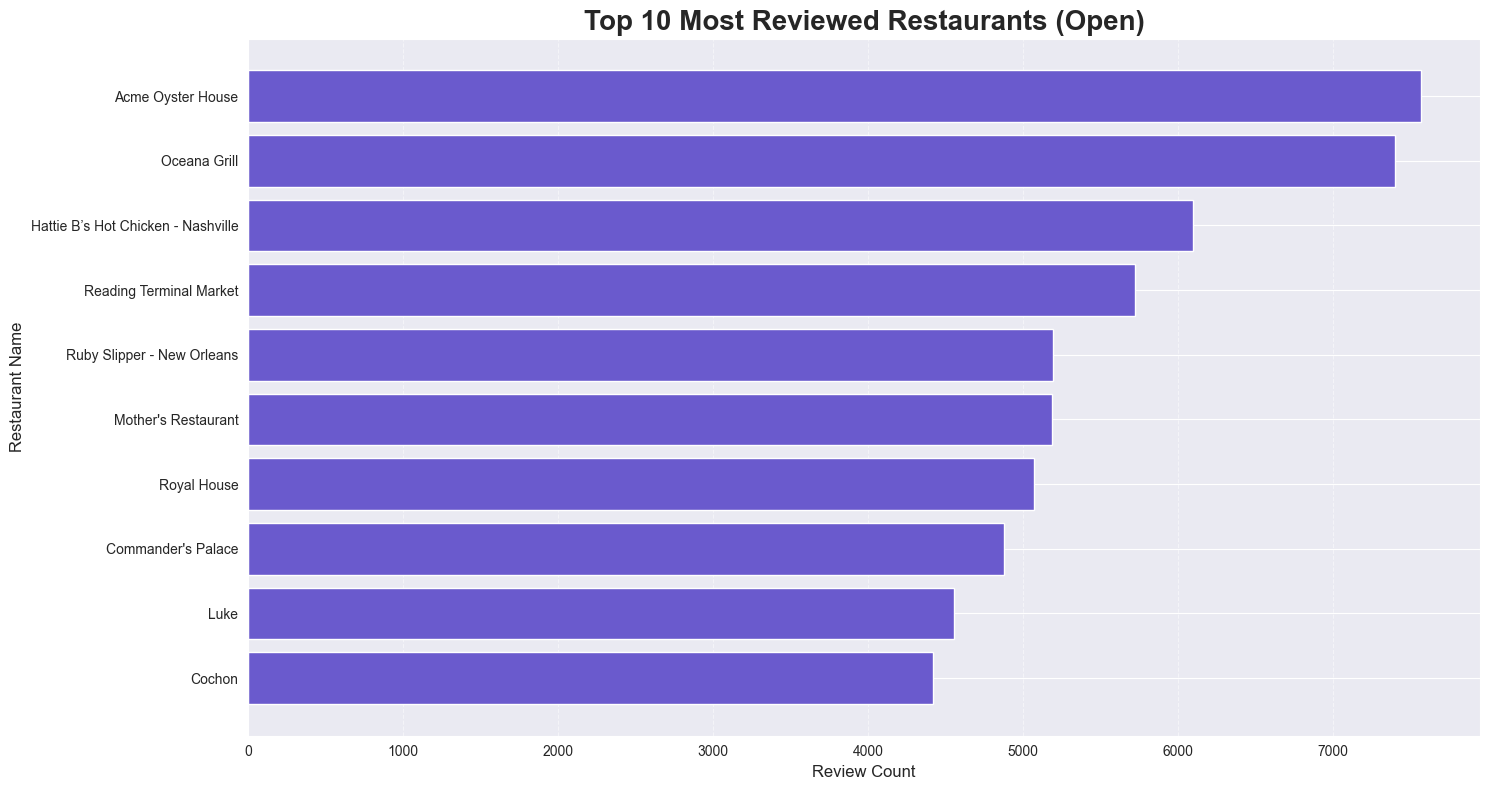

In [ ]:
#Can we predict whether a American restaurant will be highly-rated based on its characteristics and the users who review it? 
top10_american_restaurants = pd.read_sql_query(
    """
    SELECT 
        business_id, 
        name, 
        review_count, 
        categories
    FROM business
    WHERE is_open = 1
    ORDER BY review_count DESC
    LIMIT 10
    """,
    engine
)
display(top10_american_restaurants)

df_sorted = top10_american_restaurants.sort_values(by='review_count', ascending=True)

fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(df_sorted['name'], df_sorted['review_count'], color='slateblue')

ax.set_title('Top 10 Most Reviewed Restaurants (Open)', fontsize=20, fontweight='bold')
ax.set_xlabel('Review Count', fontsize=12)
ax.set_ylabel('Restaurant Name', fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

,business_id,name,city,overall_star_rating,is_open,is_highly_rated,avg_review_stars,num_reviews,avg_review_length,num_checkins
0,---kPU91CF4Lq2-WlRu9Lw,Frankie's Raw Bar,New Port Richey,4.5,1,1,4.50,24,295,11.0
1,--ZVrH2X2QXBFdCilbirsw,Chris's Sandwich Shop,Ardmore,4.5,0,1,4.72,36,378,67.0
2,-_jxFZVaC3r1TppArnlxZQ,The Locale,Brownsburg,3.5,1,0,3.45,117,586,175.0
3,-09Oc2D14vRnmirPh0vlXw,Cracker Barrel Old Country Store,Mount Holly,3.0,1,0,3.02,137,519,500.0
4,-0epFLgYq2C1Jo_W4FOBKw,Our House Cafe,Columbia,4.0,0,0,4.22,18,548,21.0
...,...,...,...,...,...,...,...,...,...,...
11492,ZZKSh6Kv3l-ku22Gw9wsnA,Steak ’n Shake,Fishers,2.0,1,0,1.84,106,452,115.0
11493,ZzLzU1FDnIZ-0fYF9Z_ObQ,Five Guys,Brandon,4.0,0,0,3.87,23,428,69.0
11494,zZNFMQrCQ9GHXXT9D9BgEQ,SweetBriar Cafe,Ambler,3.5,1,0,3.58,106,452,203.0
11495,zzO2zgfqP9ANmEWt-EZFWg,Seasons American Cuisine,Chesterfield,5.0,0,1,4.85,13,1526,17.0


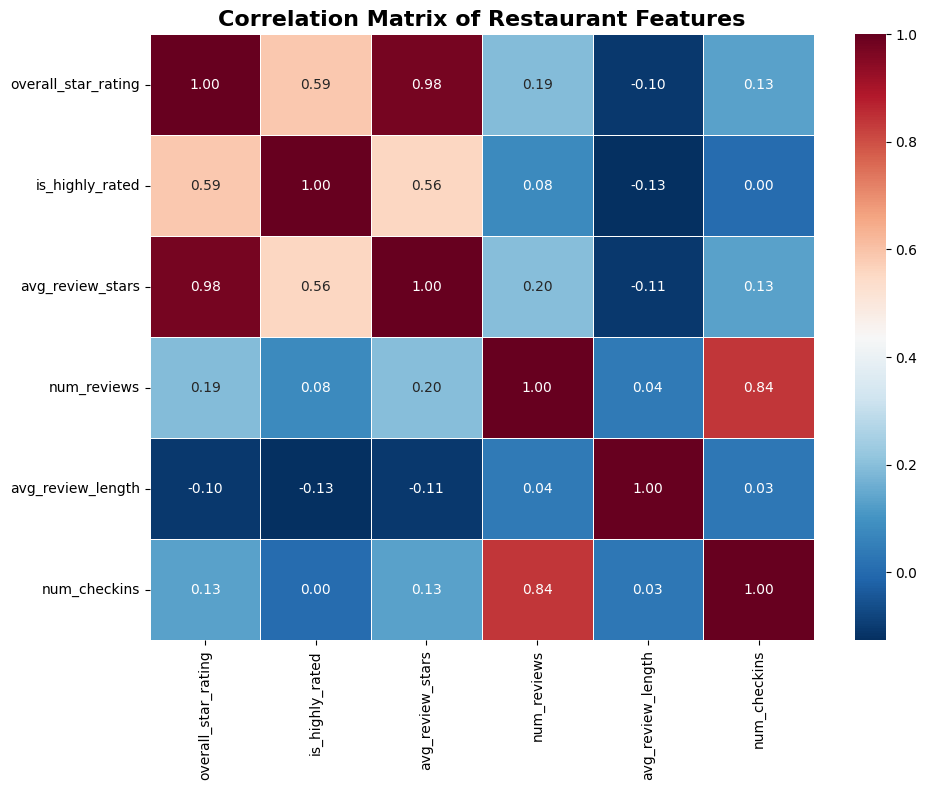

In [ ]:
#What Drives a High Rating?
highly_rated = pd.read_sql_query(
""" 
WITH business_stats AS (
    SELECT
        business_id,
        AVG(stars) as avg_review_stars,
        COUNT(review_id) as num_reviews,
        SUM(LENGTH(text)) as total_review_length
    FROM review
    GROUP BY business_id
),
checkin_stats AS (
    SELECT
        business_id,
        LENGTH(MAX(date)) - LENGTH(REPLACE(MAX(date), ',', '')) + 1 as num_checkins
    FROM checkin
    GROUP BY business_id
)
SELECT
    b.business_id,
    b.name,
    b.city,
    b.stars AS overall_star_rating,
    b.is_open,
    (CASE WHEN b.stars > 4.0 THEN 1 ELSE 0 END) as is_highly_rated, 
    ROUND(bs.avg_review_stars::numeric, 2) AS avg_review_stars,
    bs.num_reviews,
    (bs.total_review_length / bs.num_reviews) as avg_review_length,
    cs.num_checkins
FROM
    business b
JOIN
    business_stats bs ON b.business_id = bs.business_id
LEFT JOIN 
    checkin_stats cs ON b.business_id = cs.business_id
WHERE
    b.categories ILIKE '%%restaurants%%' AND b.categories ILIKE '%%american%%'
    AND bs.num_reviews > 10;

""",
engine
)
display(highly_rated)

highly_rated['num_checkins'] = highly_rated['num_checkins'].fillna(0)

numerical_features = [
    'overall_star_rating',
    'is_highly_rated',
    'avg_review_stars',
    'num_reviews',
    'avg_review_length',
    'num_checkins'
]
correlation_df = highly_rated[numerical_features]
correlation_matrix = correlation_df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt='.2f', linewidths=.5, ax=ax)
ax.set_title('Correlation Matrix of Restaurant Features', fontsize=16, fontweight='bold')
plt.show()

,user_id,review_count,fans,average_stars,user_segment
0,wxvyGoy6m6IY2F3Dyxqruw,1,0,5.00,Casual User
1,SJYPqRI29YyFC5sSFxnP3A,1,0,5.00,Casual User
2,RHKqiiDXbgUvLYxqd86AsA,18,0,3.47,Casual User
3,6JcBAl3H_VGT5ipcPrpDOA,2,0,2.33,Casual User
4,tLTnf3KG7M87dXTGALEDsQ,2,0,3.00,Casual User
...,...,...,...,...,...
1987892,LoWiK3JpbmUUQApsod8TTg,1,0,5.00,Casual User
1987893,dHRyML-0p29UZpXrOmc7rQ,1,0,1.00,Casual User
1987894,n4gXG9meQ6PErmn6Vm5sQg,1,0,1.00,Casual User
1987895,786DbC8W3AP73aGqCd7MYA,3,0,5.00,Casual User


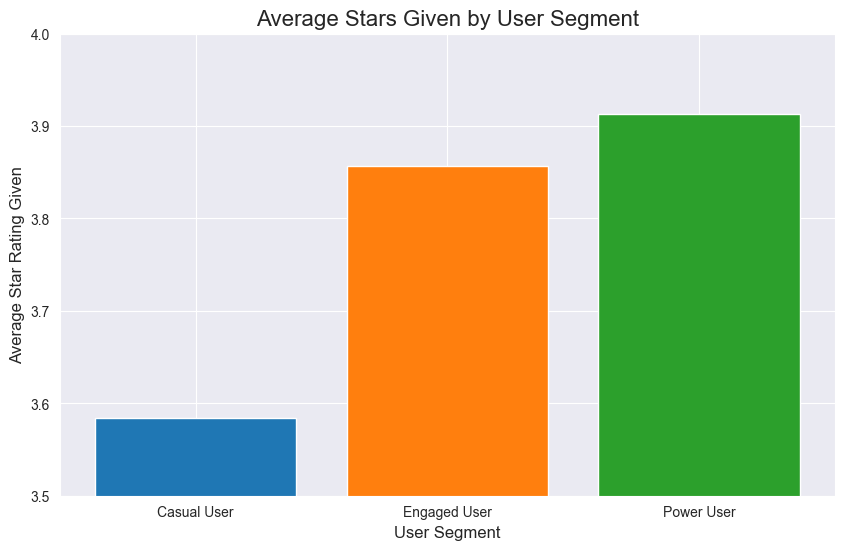

In [ ]:
#Do users with many reviews and fans rate restaurants differently than casual users?
user_category = pd.read_sql_query(
""" 
SELECT
    user_id,
    review_count,
    fans,
    average_stars,
    (CASE
        WHEN review_count > 50 AND fans > 10 THEN 'Power User'
        WHEN review_count > 10 AND fans > 0 THEN 'Engaged User'
        ELSE 'Casual User'
    END) as user_segment
FROM
    users;
""",
engine
)
display(user_category)

segment_analysis = user_category.groupby('user_segment')['average_stars'].agg(['mean', 'count']).reset_index()
segment_order = ['Casual User', 'Engaged User', 'Power User']
segment_analysis['user_segment'] = pd.Categorical(segment_analysis['user_segment'], categories=segment_order, ordered=True)
segment_analysis = segment_analysis.sort_values('user_segment')
segment_analysis = segment_analysis.rename(columns={'mean': 'avg_stars_given', 'count': 'user_count'})

plt.figure(figsize=(10, 6))

plt.bar(segment_analysis['user_segment'], 
        segment_analysis['avg_stars_given'], 
        color=['#1f77b4', '#ff7f0e', '#2ca02c']) 

plt.title('Average Stars Given by User Segment', fontsize=16)
plt.xlabel('User Segment', fontsize=12)
plt.ylabel('Average Star Rating Given', fontsize=12)
plt.ylim(3.5, 4.0)

plt.show()

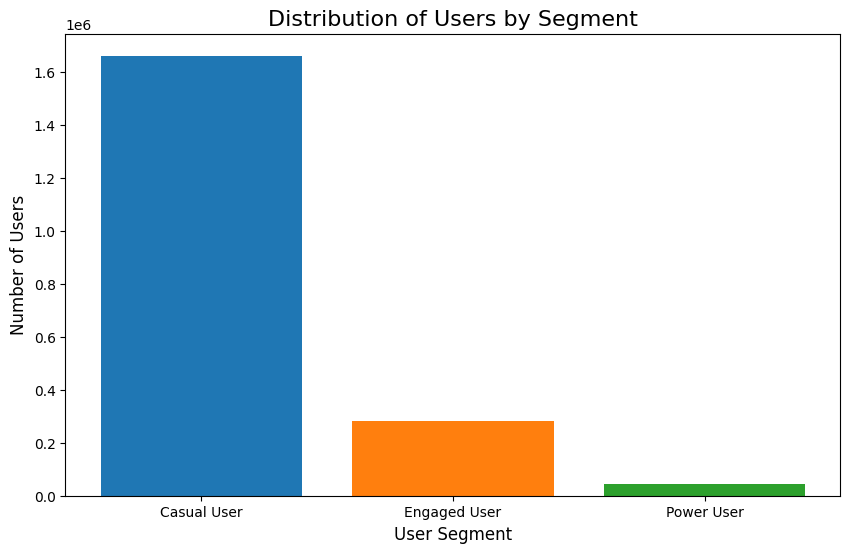

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(segment_analysis['user_segment'], 
        segment_analysis['user_count'], 
        color=['#1f77b4', '#ff7f0e', '#2ca02c'])

plt.title('Distribution of Users by Segment', fontsize=16)
plt.xlabel('User Segment', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

plt.show()

,city,num_restaurants,avg_star_rating,avg_review_count,pct_highly_rated
0,Philadelphia,3525,3.59,141.0,22.44
1,Tampa,1964,3.63,120.0,25.10
2,Indianapolis,1904,3.48,98.0,22.74
3,Nashville,1681,3.57,155.0,24.51
4,Tucson,1639,3.46,118.0,17.51
...,...,...,...,...,...
112,Fairview Heights,53,3.22,67.0,13.21
113,Medford,52,3.52,61.0,19.23
114,Royersford,52,3.51,59.0,23.08
115,Glen Mills,51,3.64,99.0,19.61


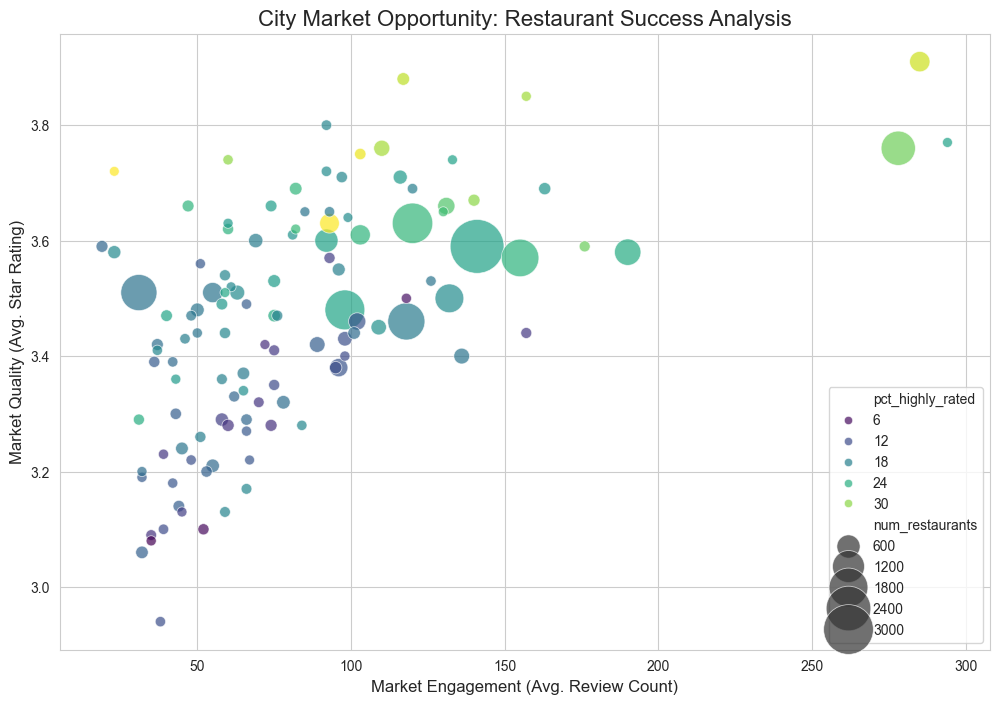

In [ ]:
#The analysis of businesses in the "Nightlife" category was conducted to find the top cities for entertainment.
city_success_query = pd.read_sql_query(
"""
SELECT
    city,
    COUNT(business_id) AS num_restaurants,
    ROUND(AVG(stars)::numeric, 2) AS avg_star_rating,
    ROUND(AVG(review_count), 0) AS avg_review_count,
    ROUND(AVG(CASE WHEN stars > 4.0 THEN 1.0 ELSE 0.0 END) * 100, 2) AS pct_highly_rated
FROM
    business
WHERE
    -- We only want to analyze currently open restaurants
    is_open = 1 AND
    categories ILIKE '%%restaurants%%'
GROUP BY
    city
HAVING
    COUNT(business_id) > 50
ORDER BY
    num_restaurants DESC;
""",
engine
)

display(city_success_query)
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=city_success_query,
    x="avg_review_count",
    y="avg_star_rating",
    size="num_restaurants",
    hue="pct_highly_rated",
    palette="viridis",   
    sizes=(50, 1500),       
    alpha=0.7               
)

plt.title("City Market Opportunity: Restaurant Success Analysis", fontsize=16)
plt.xlabel("Market Engagement (Avg. Review Count)", fontsize=12)
plt.ylabel("Market Quality (Avg. Star Rating)", fontsize=12)

plt.grid(True)

plt.show()

,city,nightlife_business_count,avg_star_rating,total_tips_count
0,Philadelphia,896,3.64,21978.0
1,New Orleans,660,3.91,20204.0
2,Nashville,616,3.85,13639.0
3,Tampa,508,3.78,11333.0
4,Indianapolis,460,3.86,11328.0
5,Tucson,359,3.72,8948.0
6,Saint Louis,353,3.78,9377.0
7,Reno,315,3.91,6412.0
8,Edmonton,282,3.59,1908.0
9,Boise,190,3.88,2091.0


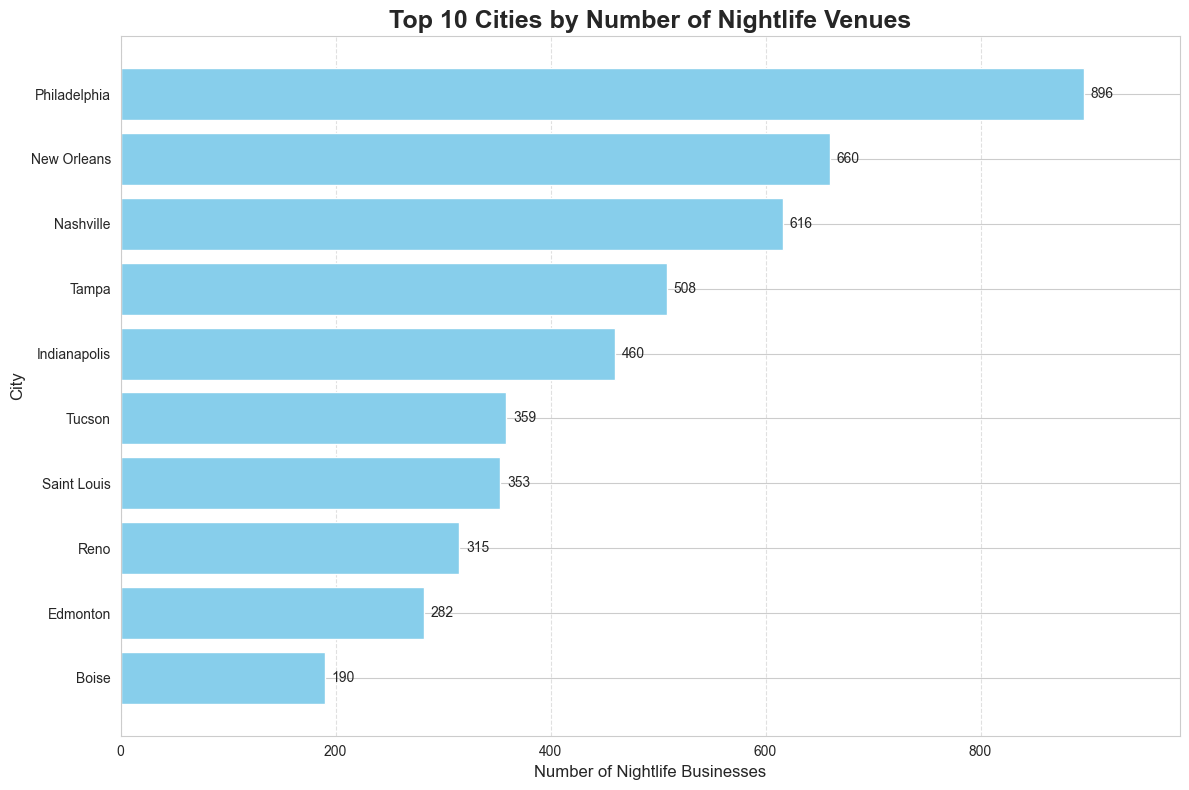

In [ ]:
#Nightlife Hotspots
nightlife = pd.read_sql_query(
""" 
WITH nightlife_businesses AS (
    SELECT
        business_id,
        city,
        stars
    FROM
        business
    WHERE
        categories ILIKE '%%nightlife%%' 
            AND is_open = 1
),
tip_counts AS (
    SELECT
        business_id,
        COUNT(user_id) AS num_tips 
    FROM
        tip
    GROUP BY
        business_id
)
SELECT
    nb.city,
    COUNT(DISTINCT nb.business_id) AS nightlife_business_count,
    ROUND(AVG(nb.stars)::numeric, 2) AS avg_star_rating,
    SUM(COALESCE(tc.num_tips, 0)) AS total_tips_count
FROM
    nightlife_businesses nb
LEFT JOIN
    tip_counts tc ON nb.business_id = tc.business_id
GROUP BY
    nb.city
HAVING
    COUNT(DISTINCT nb.business_id) > 50
ORDER BY
    nightlife_business_count DESC
LIMIT 10;
""",
engine
)
display(nightlife)

df_sorted = nightlife.sort_values('nightlife_business_count', ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(df_sorted['city'], df_sorted['nightlife_business_count'], color='skyblue')

ax.bar_label(bars, padding=5)

ax.set_title('Top 10 Cities by Number of Nightlife Venues', fontsize=18, fontweight='bold')
ax.set_xlabel('Number of Nightlife Businesses', fontsize=12)
ax.set_ylabel('City', fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.6)

ax.set_xlim(right=df_sorted['nightlife_business_count'].max() * 1.1)

plt.tight_layout()
plt.show()

,date
0,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,"2010-10-01 16:31:41, 2010-12-16 19:13:47, 2011..."
3,"2021-09-15 16:08:07, 2021-09-30 17:10:48, 2021..."
4,"2011-07-29 16:37:02, 2011-10-24 16:00:29, 2012..."
...,...
1995,"2013-02-05 23:01:55, 2013-02-13 06:46:24, 2013..."
1996,"2014-11-19 18:06:47, 2014-11-29 02:02:46, 2014..."
1997,"2018-02-14 22:41:14, 2018-03-10 01:18:20, 2018..."
1998,"2016-04-23 02:04:19, 2016-04-25 01:38:40, 2017..."


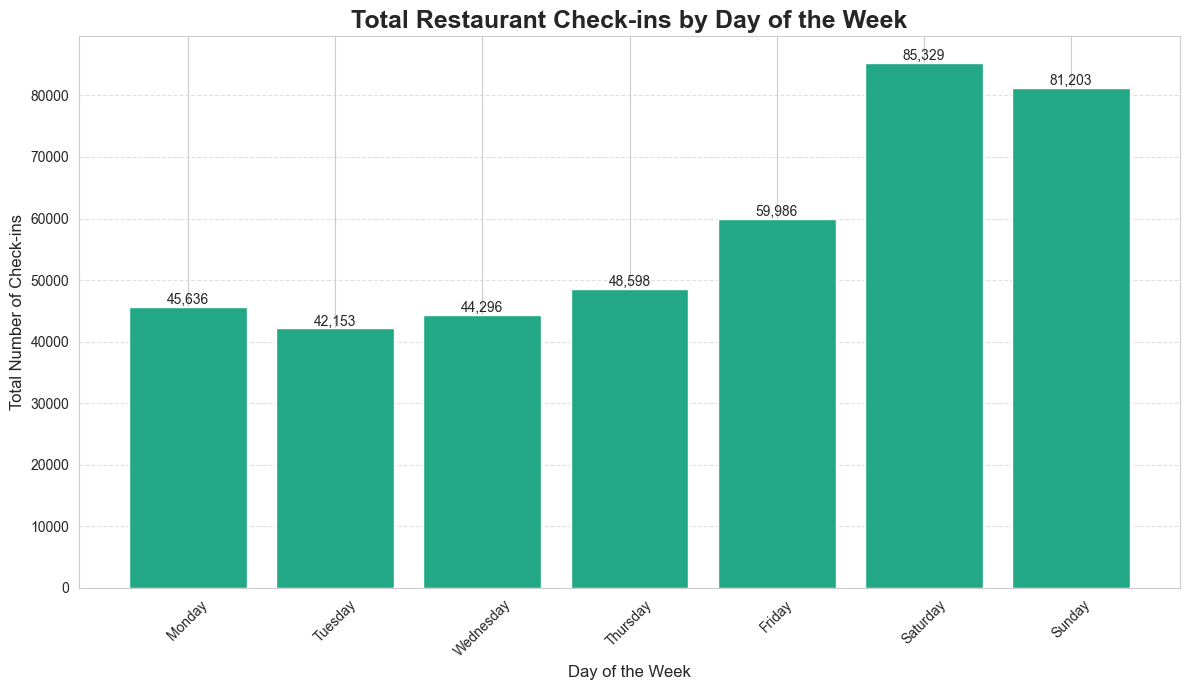

In [ ]:
#On which days of the week do customers check in most frequently at open restaurants?
checkin_df = pd.read_sql_query(
"""
SELECT
    date
FROM
    checkin c
JOIN
    business b ON c.business_id = b.business_id
WHERE
    b.is_open = 1
    AND b.categories ILIKE '%%restaurants%%'
LIMIT 2000;
""",
engine
)
display(checkin_df)

daily_checkin_counts = Counter()

for index, row in checkin_df.iterrows():
    timestamps = row['date'].split(', ')
    for ts in timestamps:
        try:
            real_date = pd.to_datetime(ts)
            day_name = real_date.day_name()
            daily_checkin_counts[day_name] += 1
        except (ValueError, pd.errors.ParserError):
            continue

daily_counts_df = pd.DataFrame(daily_checkin_counts.items(), columns=['Day', 'Total Check-ins'])
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts_df['Day'] = pd.Categorical(daily_counts_df['Day'], categories=day_order, ordered=True)
daily_counts_df = daily_counts_df.sort_values('Day')


fig, ax = plt.subplots(figsize=(12, 7))

bars = ax.bar(daily_counts_df['Day'], 
              daily_counts_df['Total Check-ins'], 
              color=plt.get_cmap('viridis')(0.6))


ax.bar_label(bars, fmt='{:,.0f}')

ax.set_title('Total Restaurant Check-ins by Day of the Week', fontsize=18, fontweight='bold')
ax.set_ylabel('Total Number of Check-ins', fontsize=12)
ax.set_xlabel('Day of the Week', fontsize=12)

plt.xticks(rotation=45)

ax.yaxis.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

,stars,user_type,review_count
0,1.0,Elite,69350
1,2.0,Elite,114558
2,3.0,Elite,279028
3,4.0,Elite,602256
4,5.0,Elite,660466
5,1.0,Non-Elite,1000200
6,2.0,Non-Elite,429682
7,3.0,Non-Elite,412906
8,4.0,Non-Elite,850660
9,5.0,Non-Elite,2571141


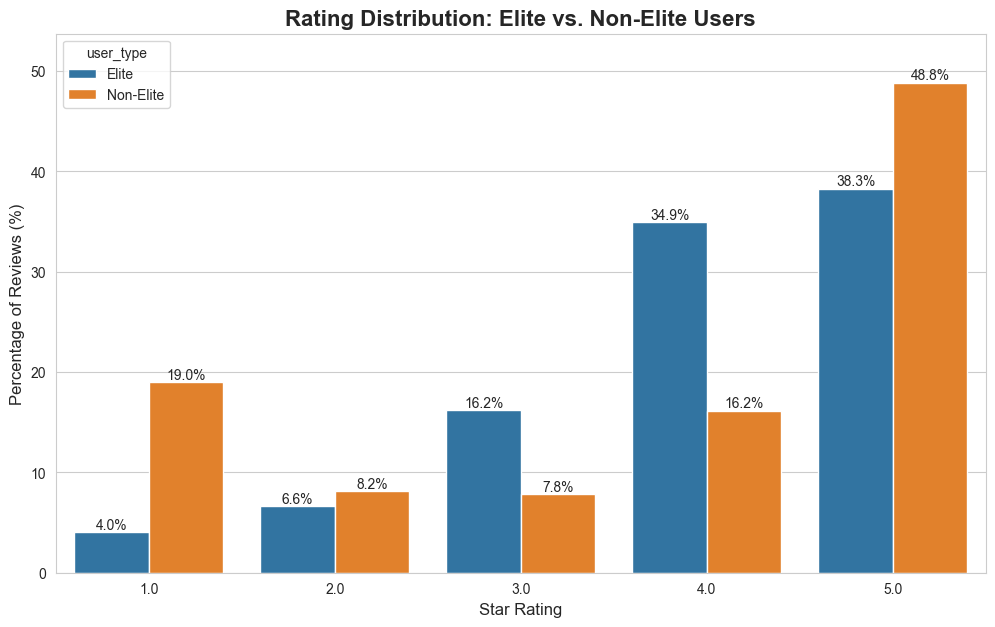

In [ ]:
#his query counts the number of reviews for each star rating (1-5) and separates them by whether the user has ever been an Elite member.
rating_dist_query = pd.read_sql_query(
"""
SELECT
    r.stars,
    CASE
        WHEN u.elite != '' AND u.elite IS NOT NULL THEN 'Elite'
        ELSE 'Non-Elite'
    END AS user_type,
    COUNT(r.review_id) as review_count
FROM
    review r
JOIN
    users u ON r.user_id = u.user_id
GROUP BY
    r.stars, user_type
ORDER BY
    user_type, r.stars;
""",
engine
)
display(rating_dist_query)

rating_dist_query['percentage'] = rating_dist_query.groupby('user_type')['review_count'].transform(lambda x: (x / x.sum()) * 100)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=rating_dist_query,
    x='stars',
    y='percentage',
    hue='user_type'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title('Rating Distribution: Elite vs. Non-Elite Users', fontsize=16, fontweight='bold')
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Percentage of Reviews (%)', fontsize=12)

plt.ylim(0, rating_dist_query['percentage'].max() * 1.1)

plt.show()

,review_year,total_reviews,elite_reviews
0,2005.0,854,510
1,2006.0,3853,2298
2,2007.0,15363,9505
3,2008.0,48226,25925
4,2009.0,74387,31790
5,2010.0,138587,54543
6,2011.0,230813,84143
7,2012.0,286570,98722
8,2013.0,383950,119212
9,2014.0,522275,131493


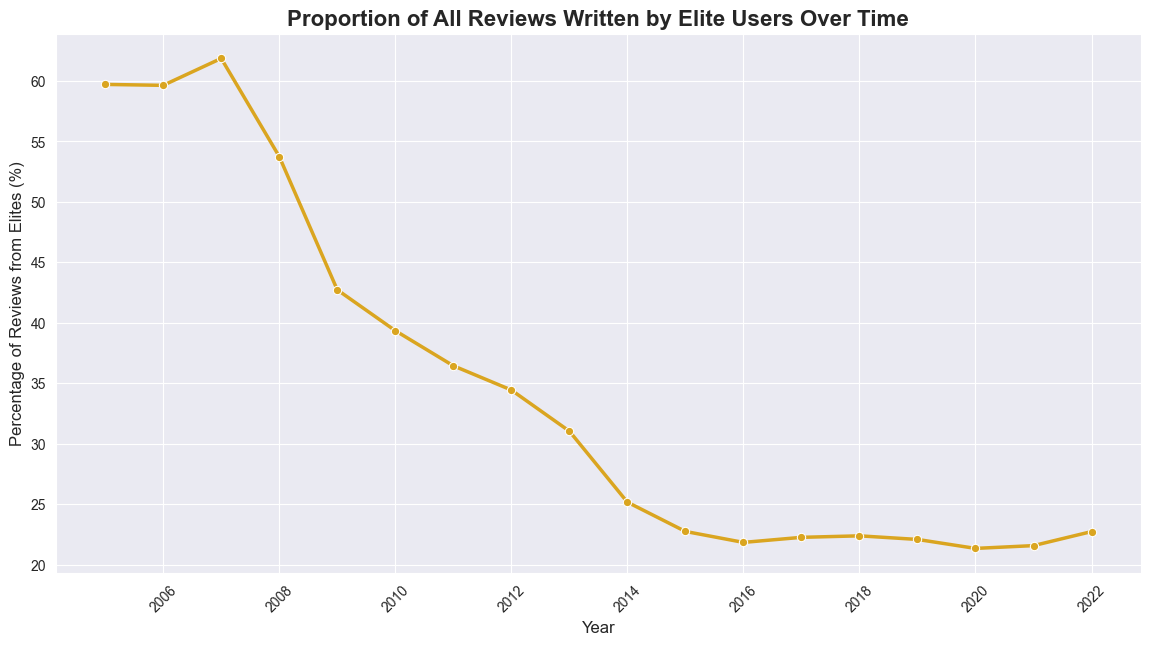

In [ ]:
#counting the total reviews and the number of reviews from elite users for each year.
elite_trend_query = pd.read_sql_query(
"""
SELECT
    EXTRACT(YEAR FROM r.date) AS review_year,
    COUNT(r.review_id) AS total_reviews,
    COUNT(CASE WHEN u.elite != '' AND u.elite IS NOT NULL THEN r.review_id ELSE NULL END) AS elite_reviews
FROM
    review r
JOIN
    users u ON r.user_id = u.user_id
WHERE EXTRACT(YEAR FROM r.date) BETWEEN 2005 AND 2022
GROUP BY
    review_year
ORDER BY
    review_year;
""",
engine
)
display(elite_trend_query)

elite_trend_query['review_year'] = elite_trend_query['review_year'].astype(int)
elite_trend_query['elite_proportion_pct'] = (elite_trend_query['elite_reviews'] / elite_trend_query['total_reviews']) * 100

sns.set_style("darkgrid") 
fig, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(
    data=elite_trend_query,
    x='review_year',
    y='elite_proportion_pct',
    marker='o',
    color='goldenrod',
    linewidth=2.5,
    ax=ax 
)

ax.set_title('Proportion of All Reviews Written by Elite Users Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Percentage of Reviews from Elites (%)', fontsize=12)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45) 

plt.show()